In [1]:
import os
import sys

# Add the project root directory to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

In [2]:
import torch
from transformers import ViTForImageClassification

from src.make_dataset import vit_transform
from src.process import open

/home/calvin/Projects/icon-classifier/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load Icon Classifier

In [3]:
model = ViTForImageClassification.from_pretrained("../models/results/final_model")

# Inference

In [4]:
def tensors_from_imgs(img_paths):
    img_tensors = [vit_transform(open(img_path)) for img_path in img_paths]
    return torch.stack(img_tensors)


def infer_class(img_paths):
    img_tensors = tensors_from_imgs(img_paths)

    # Perform inference
    with torch.no_grad():  # Disable gradient computation during inference
        outputs = model(img_tensors)
        logits = outputs.logits
    
    # Convert logits to probabilities
    probs = torch.softmax(logits, dim=-1)

    # Get predicted classes for the batch
    predicted_class_idx = logits.argmax(dim=-1)
    predicted_class_labels = [model.config.id2label[i] for i in predicted_class_idx.tolist()]
    predicted_class_probs = [probs[i, j].item() for i,j in enumerate(predicted_class_idx.tolist())]

    return list(zip(img_paths, predicted_class_labels, predicted_class_probs))

In [5]:
# Example images
img_paths = [
    "../data/raw/wikimedia/png/480px-ISO_7000_-_Ref-No_0246.svg.png", 
    "../data/raw/wikimedia/png/480px-ISO_7000_-_Ref-No_0082.svg.png",
    "../data/raw/wikimedia/png/480px-ISO_7000_-_Ref-No_0098.svg.png"  # Example not in train/test dataset
]

inference_result = infer_class(img_paths)
inference_result 

[('../data/raw/wikimedia/png/480px-ISO_7000_-_Ref-No_0246.svg.png',
  '0246',
  0.9996232986450195),
 ('../data/raw/wikimedia/png/480px-ISO_7000_-_Ref-No_0082.svg.png',
  '0082',
  0.9991819262504578),
 ('../data/raw/wikimedia/png/480px-ISO_7000_-_Ref-No_0098.svg.png',
  '0087',
  0.21028754115104675)]

Ref-No_0082 is actually a pretty good match for unknown image (Ref-No_0098)

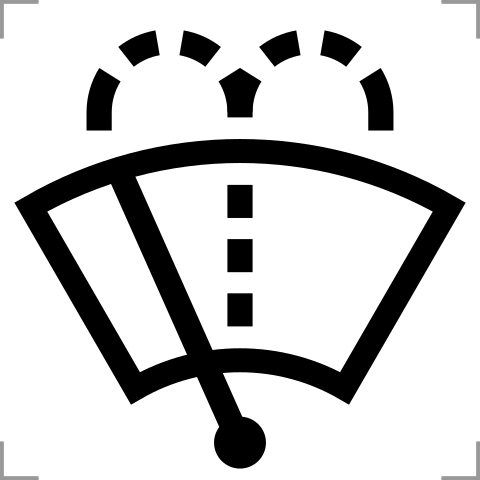

In [6]:
open("../data/raw/wikimedia/png/480px-ISO_7000_-_Ref-No_0087.svg.png")

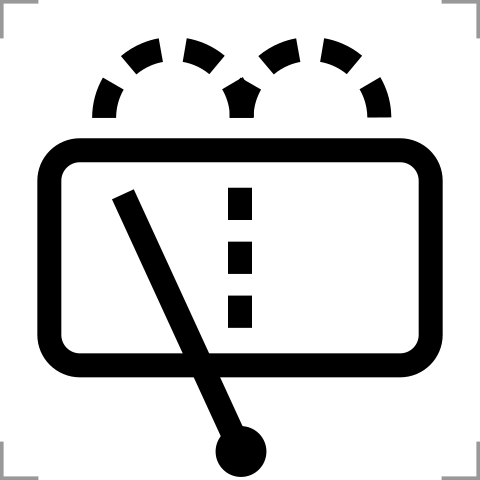

In [7]:
open("../data/raw/wikimedia/png/480px-ISO_7000_-_Ref-No_0098.svg.png")